![Astrofisica Computacional](../logo.PNG)

---
## 01. Transformada de Fourier


Eduard Larrañaga (ealarranaga@unal.edu.co)

---



### Resumen

En este cuaderno se presentan las transformadas de Fourier de una función. 

---

Las transformadas de Fourier son una herramienta muy importante para entender, analizar suavizar y filtrar funciones o señales. También permiten resolver algunas ecuaciones diferenciales.

---
## Series de Fourier 

Consideraremos  una función periodica $f(x)$ en un intervalo finito $0\leq x < L$. Si la función es par (simétrica) con respecto al punto medio $x = \frac{L}{2}$, la función puede expandirse en ua serie de cosenos con la forma

\begin{equation}
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos \left( \frac{2\pi kx}{L} \right).
\end{equation}

Si la función es impar con respecto al punto medio del intervalo, se puede expandir en términos de funciones seno,

\begin{equation}
f(x) = \sum_{k=1}^{\infty} \beta_k \sin \left( \frac{2\pi kx}{L} \right).
\end{equation}

En los dos casos, los coeficientes $\alpha_k$ y $\beta_k$ son constantes que determinan las diferentes contribuciones en la superposición. 

En el caso de una función general (sin una simetría especial), se puede realizar la expansión 

\begin{equation}
f(x) = \sum_{k=0}^{\infty} \alpha_k \cos \left( \frac{2\pi kx}{L} \right) + \sum_{k=1}^{\infty} \beta_k \sin \left( \frac{2\pi kx}{L} \right)
\end{equation}

la cual puede re-escribirse en términos de funciones exponenciales complejas,

\begin{equation}
f(x) = \sum_{k=-\infty}^{\infty} \gamma_k \exp \left( i\frac{2\pi kx}{L} \right) 
\end{equation}

donde 

\begin{equation}
\gamma_k = 
\begin{cases}
\frac{1}{2}(\alpha_{-k} + i \beta_{-k}) & \text{ si }k<0\\
\alpha_0 & \text{ si }k=0\\
\frac{1}{2}(\alpha_{k} - i \beta_{k}) & \text{ si }k>0
\end{cases}
\end{equation}

Cuando la función $f(x)$ no es periodica, es posible realizar la expansión en serie de Fourier considerando la función en el intervalo $0\leq x <L$ y repitiendo este comportamiento una y otra vez a izquierda y derecha. Sin embargo, la serie obtenida solo será util en el intervalo considerado. 

---
### Coeficientes en la Serie de Fourier

Los coeficientes $\gamma_k$ son, en general, números complejos y pueden obtenerse mediante la expresión

\begin{equation}
\gamma_k = \frac{1}{L} \int_0^L f(x) \exp \left( -i\frac{2\pi kx}{L}\right) dx .
\end{equation}

## Transformada Discreta de Fourier (DFT)

A nivel computacional, la integral que define los coeficientes en la serie de Fourier debe realizarse numéricamente. Discretizando el intervalo de integración definiendo $n$ nodos, se tendran $n-1$ sub-intervalos con un tamaño $\Delta x = \frac{L}{n}$. Al utilizar la regla del trapezoide descrita en una clase anterior, se tiene

\begin{equation}
\gamma_k = \frac{1}{n}\left[ \frac{1}{2}f(0) + \frac{1}{2} f(L) + \sum_{j=1}^{n-1} f(x_j) \exp\left( -i \frac{2\pi kx_j}{L} \right) \right].
\end{equation}

Ya que la función debe ser periodica en el intervalo de integración , se tiene $f(0) = f(L)$ y con ello los dos primeros terminos se ueden incorporar dentro de la sumatoria,

\begin{equation}
\gamma_k = \frac{1}{n}\sum_{j=0}^{n-1} f(x_j) \exp\left( -i \frac{2\pi kx_j}{L} \right).
\end{equation}

Finalmente, debido a que los intervalos son iguales se puede escribir

\begin{equation}
x_j = \frac{j}{n}L
\end{equation}

Los coeficientes s epueden escribir en la forma

\begin{equation}
\gamma_k = \frac{1}{n}\sum_{j=0}^{n-1} f(x_j) \exp\left( -i \frac{2\pi kj}{n} \right).
\end{equation}

Aunque esta expresión yas corresponde a la transformada de Fourier, en muchas referencias bibliográficas se suele denominar *Transformada Discreta de Fourier (DFT)* a los coeficientes

\begin{equation}
c_k = \sum_{j=0}^{n-1} f_j \exp\left( -i \frac{2\pi kj}{n} \right)
\end{equation}

de tal forma que $c_k = n \gamma_k$ y donde se ha utilizado $f_j = f(x_j)$.

A partir de los coeficientes obtenidos se puede recuperar la discretización de la función. A esto se le denomina *Inversa de la Transformada Discreta de Fourier* y corresponde a la relación

\begin{equation}
f_j = \frac{1}{n} \sum_{k=0}^{n-1} c_k \exp\left( i \frac{2\pi kj}{n} \right).
\end{equation}

### DFT de una Función Real

Los resultados descritos arriba son aplicables a funciones reales o complejas. Sin embargo, en el caso de funciones reales el tiempo de computo de los coeficientes se puede reducir notablemente. 

Para comprender la razón, considere el coeficiente $c_k$ para un índice $k$ menor que $n$ pero mayor que $\frac{1}{2}N$. Se puede re-escribir entonces $k = n - p$ con $1\leq p < \frac{1}{2}n$. Se tiene entonces que

\begin{align}
c_{n-p} = &\sum_{j=0}^{n-1} f_j \exp\left( -i \frac{2\pi (n-p)j}{n} \right)\\ 
c_{n-p} = & \sum_{j=0}^{n-1} f_j \exp\left( -i 2\pi j \right) \exp\left( i \frac{2\pi pj}{n} \right) \\
c_{n-p} = & \sum_{j=0}^{n-1} f_j  \exp\left( i \frac{2\pi pj}{n} \right)\\
c_{n-p} = & c^*_p,
\end{align}

donde $^*$ signifca complejo conjugado. Esta relación quiere decir que 

\begin{align}
c_{n-1} = &c^*_1 \\
c_{n-2} = &c^*_2 \\
c_{n-3} = &c^*_3 \\
...
\end{align}

Si la función es real, se concluye que solo se deben calcular los coeficientes  $c_k$  para $0\leq k \leq \frac{1}{2}n$ y los demás quedan automáticamente definidos.

### Ejemplo

En el archivo `signal.txt` se encuentran los datos de una señal para la cual calcularemos su DFT.

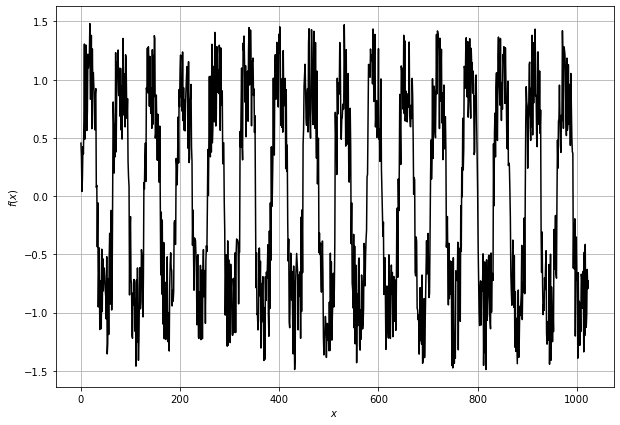

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
f_data = np.loadtxt( 'signal.txt')
x_data = np.arange(len(f_data))
plt.figure(figsize=(10,7))
plt.plot(x_data, f_data, color='black')
plt.title('')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.show()

El número total de datos es

In [2]:
n = len(f_data)
n

1024

In [3]:
c = np.zeros(n//2+1, complex)
for k in range(n//2+1):
    for i in range(n):
        c[k] += f_data[i]*np.exp(-2j*np.pi*k*i/n) 


In [4]:
c

array([ 6.66030160e+00+0.00000000e+00j,  5.04602896e+00-1.22810603e+01j,
       -9.86459267e+00+5.80734103e+00j,  8.04598719e+00-5.18535619e+00j,
        3.90394877e+00-7.77479862e+00j,  5.41221116e+00-2.64834708e-01j,
       -1.27853927e+01-3.39627922e+00j,  8.23792070e+00-3.21119098e+00j,
       -6.54357010e+00+1.84283634e+00j,  4.66777122e+00+5.24607859e+00j,
       -9.01982252e+00-1.29366889e+01j,  4.49001826e+00+5.08583780e-01j,
       -3.76417822e+00+2.36842246e+00j, -4.78066174e+00-6.39200152e-01j,
       -4.93285529e+00+1.22414583e+00j, -1.51415938e+01+3.35596891e+00j,
       -8.55327441e+00-5.77578973e+02j, -1.23030807e+00+2.88436289e+00j,
        6.06112938e+00-6.11744051e+00j, -1.16278221e+01-7.17508461e-02j,
       -1.17697073e+01+3.54842084e+00j,  7.40242820e+00+1.44650063e+01j,
       -3.42360656e+00+3.50384671e+00j,  3.15352743e+00-1.35618818e+01j,
       -2.89797765e+00-6.01158417e+00j, -4.06415648e+00-6.48724952e+00j,
       -2.55073534e+00+1.73077172e+00j, -1.28140984

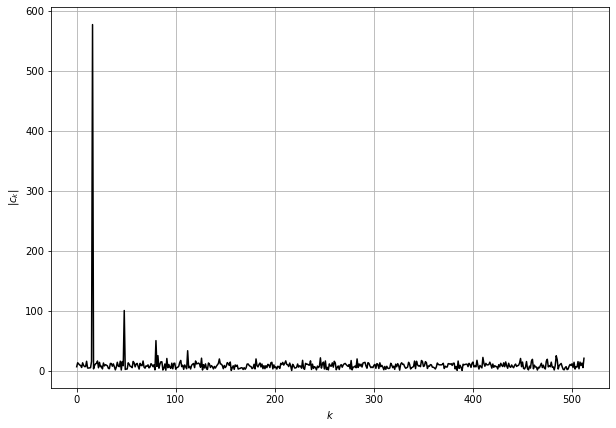

In [5]:
plt.figure(figsize=(10,7))
plt.plot(range(len(c)), abs(c), color='black')
plt.title('')
plt.xlabel(r'$k$')
plt.ylabel(r'$\left| c_k \right|$')
plt.grid()
plt.show()

## Transformada de Fourier 2-Dimensional

El desarrollo presentado se puede extender fácilmente al caso de funciones 2-dimensionales, $f(x,y)$. Para ello se realiza la DFT con respecto a una de las variables y luego con respecto a la otra variable de forma independiente.

Considere la función

\begin{equation}
f_{\mu, \nu} = f(x_\mu, y_\nu)
\end{equation}

con $\mu = 0, 1, 2, ..., m-1$ y $\nu = 0, 1, 2, ..., n-1$. Primero se realiza la transformada sobre cada una de $\mu$,

\begin{equation}
c'_{\mu, \beta} = \sum_{\nu=0}^{n-1}f_{\mu,\nu} \exp \left( -i\frac{2\pi \beta \nu}{n} \right).
\end{equation}

De esta forma, para cada $\mu$ se tienen $n$ coeficientes etiquetados con el índice $\beta$. 

Ahora se realiza la DFT para cada valor de $\beta$,

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{m-1}c'_{\mu,\beta} \exp \left( -i\frac{2\pi \alpha \mu}{m} \right).
\end{equation}

Al unir estas dos ecuaciones se obtiene la transformada 2-dimensional

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{m-1}\sum_{\nu=0}^{n-1}f_{\mu,\nu} \exp \left( -i\frac{2\pi \beta \nu}{n} \right) \exp \left( -i\frac{2\pi \alpha \mu}{m} \right)
\end{equation}

\begin{equation}
c_{\alpha, \beta} = \sum_{\mu=0}^{m-1}\sum_{\nu=0}^{n-1}f_{\mu,\nu} \exp \left[ -i2\pi \left(   \frac{ \alpha \mu}{m} + \frac{ \beta \nu}{n} \right) \right]
\end{equation}


De forma similar, la DFT inversa resulta ser

\begin{equation}
f_{\mu, \nu} = \sum_{\alpha=0}^{m-1}\sum_{\beta=0}^{n-1} c_{\alpha,\beta} \exp \left[ i2\pi \left(   \frac{ \alpha \mu}{m} + \frac{ \beta \nu}{n} \right) \right]
\end{equation}

---
## Transformada Rápida de Fourier (FFT)

Para realizar la DFT,

\begin{equation}
c_k = \sum_{j=0}^{n-1} f_j \exp\left( -i \frac{2\pi kj}{n} \right)
\end{equation}

se requiere calcular $\frac{1}{2} (n+1)$ coeficientes y enc ada uno de ellos se deben sumar $n$ términos. Por ello el número total de operaciones es $\frac{1}{2} (n+1)n \sim \mathcal{O} \left( \frac{1}{2} n^2\right)$.

Para mejorar el tiempo de cálculo, se puede optimizar el proceso introduciendo la *Transformada Rápida de Fourier (FFT)*. Para compredner este procedimiento supondremos que la muestra tiene $n=2^m$ datos. Como $n$ es una potnecia de $2$ es posible dividir la muestra en dos sub-conjuntos de igual tamaño: aquellos con $j$ par y aquellos con $j$ impar.

Para los datos pares, escribimos $j=2\alpha$ con $\alpha = 0,1,2,..,\frac{1}{2}n-1$ y con ello, la DFT toma la forma
 
\begin{equation}
E_k = \sum_{\alpha=0}^{\frac{1}{2}n-1} f_{2\alpha} \exp\left( -i \frac{2\pi k(2\alpha )}{n} \right) = \sum_{\alpha=0}^{\frac{1}{2}n-1} f_{2\alpha} \exp\left( -i \frac{2\pi k\alpha}{\frac{1}{2}n} \right)
\end{equation}

que corresponde simplemente a una DFT con $\frac{1}{2}n$ datos. 

De forma similar, para los valores impares se escribe $j=2\alpha +1$ y al DFT toma la forma

\begin{equation}
\sum_{\alpha=0}^{\frac{1}{2}n-1} f_{2\alpha+1} \exp\left( -i \frac{2\pi k(2\alpha +1)}{n} \right) = \exp\left( -i \frac{2\pi k}{n} \right) \sum_{\alpha=0}^{\frac{1}{2}n-1} f_{2\alpha+1} \exp\left( -i \frac{2\pi k\alpha}{\frac{1}{2}n} \right) = \exp\left( -i \frac{2\pi k}{n} \right) O_k
\end{equation}

donde $O_k$ es una DFT con $\frac{1}{2}n$ datos.

EL coeficiente de Fourier Completo se obtiene al sumar términos pares e impares, i.e.

\begin{equation}
c_k =E_k + \exp\left( -i \frac{2\pi k}{n} \right) O_k
\end{equation}

De esta expresión se puede notar que, para calcular el coeficiente $c_k$ en la DFT, se reuquiere calcular dos términos $E_k$ y $O_k$ que son dos DFT mas pequeños (con la mitad de los datos) y un factor (twiddle factor) que es trivial de calcular.
Este proceso de reducción puede repetirse nuevamente al dividir cada uno de los coeficientes en dos DFT mas pequeñas y un (twiddle) factor adicional. El proceso de sub-división se repite hasta que se llega al momento en el que cada DFT es la transformada de un solo dato. El coeficiente de Fourier correspondiente es simplemente

\begin{equation}
c_0 = \sum_{j=0}^{0} f_0 e^0 = f_0,
\end{equation}

es decir solo un término!!!

Para comprender porque se mejora el tiempo de calculo con este procedimiento, debemos notar que para descomponer completamente el conjunto de $2^m$ datos se requieren $m=\log_2 n$ niveles de división. Por lo tanto, el número de coeficientes que se deben calcular en todo el procesos es de $n$ en cada uno de los $\log_2 n$ niveles y por lo tanto el número total de operaciones involucradas es de $\mathcal{O} \left( n \log_2 n\right)$ el cual es mucho mejor que el orden $\mathcal{O} \left( \frac{1}{2} n^2\right)$ de la DFT.


Por ejemplo, para una muestra de $n= 10^6$ datos la DFT requiere $\mathcal{O} \left( \frac{1}{2} n^2\right) \sim 5 \times 10^{11}$ operaciones mientras que la FFT requiere  $\mathcal{O} \left( n \log_2 n\right) \sim 2 \times 10^7$ operaciones.

---
En python se tienen varias implementaciones de la FFT. Por ejemplo están las funciones 

- [scipy.fft](https://docs.scipy.org/doc/scipy/tutorial/fft.html)
- [numpy.fft](https://numpy.org/doc/stable/reference/routines.fft.html)